Se importan las librerías que voy a usar a lo largo del código

In [ ]:
import matplotlib.pyplot as plt #https://matplotlib.org/stable/plot_types/index.html documentación
import numpy as np
from scipy.signal import find_peaks
import pandas as pd
from scipy.optimize import curve_fit #https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

Una buena práctica es definir las unidades en MKS para luego no lidiar con problemas de pasajes de unidades, bastará con multiplicar con la unidad correspondiente. En python # nos indica que esa línea se utilizará como comentario, por lo tanto al compilar no será tenida en cuenta.

In [ ]:
#long
km = pow(10,3) 
cm = pow(10,-2)
mm = pow(10,-3)
um = pow(10,-6) 
nm = pow(10,-9)
pm = pow(10,-12)
#tiempo
ms = pow(10,-3)
us = pow(10,-6) 
ns = pow(10,-9)
ps = pow(10,-12)
fs = pow(10,-15)
#frecuencia
KHz = pow(10,3)
MHz= pow(10,6) 
GHz= pow(10,9)
THz= pow(10,12)
#Potencia
mW = pow(10,-3)
uW = pow(10,-6) 
#Velocidad de la luz
c=3*pow(10,8)

Leo el archivo de texto donde se encuentran los datos. Notar que se deben agregar en la sección de la izquierda donde se encuentra el símbolo de carpeta.

In [ ]:
datos=pd.read_csv('/content/drive/MyDrive/FE II/datosej.dat', header=None, sep='\t', engine='python')
tiempo = datos[0] #datos[0][500:5790] primer corchete columna que leo y el segundo me define un rango de filas :500 me agarra <=500, 500: me toma >=50.
intensidad = datos[1]

Grafico los datos experimentales

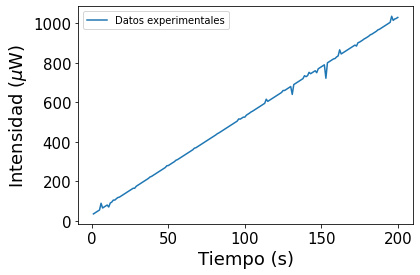

In [ ]:
plt.plot(tiempo,intensidad,label='Datos experimentales') #en este caso se grafica con una recta que une los puntos.
#plt.scatter(tiempo,intensidad) #con este comando grafico con puntos
plt.xlabel('Tiempo (s)',fontsize=18)
plt.ylabel(r'Intensidad ($\mu$W)',fontsize=18)  #se puede agregar leyendas en formato latex escribiendo r' $esto en formato latex$ ', es útil para las ecuaciones
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend()
plt.show()

Defino la función a ajustar. Una buena práctica es poner entre las ''' qué hace la función, que significa cada parámetro. Como primer elemento siempre se define 

In [ ]:
def func(x,m,b):
    '''
    Define una función lineal, siendo m la pendiente de la recta y b la ordenada al origen
    '''
    y= m*x+b
    return y

Ajusto la función deseada a los datos experimentales.

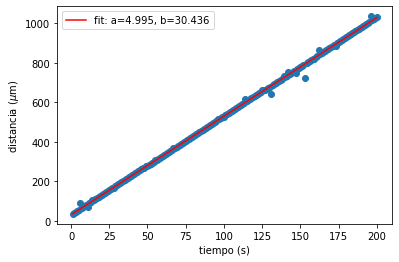

In [ ]:
popt, pcov = curve_fit(func, tiempo,intensidad) # por defecto los valores iniciales con los que comienza el ajuste es 1, si queremos utilizar otros debemos agregar ,p0=[0.74,0.866,10,1.45]
plt.plot(tiempo, func(np.array(tiempo), *popt), 'r-', label='fit: a=%5.3f, b=%5.3f' % tuple(popt)) # con 'r-' elijo el color y el tipo de señalización se utliza para esos datos, por ej, en este caso el gráfico será rojo y con una linea.
plt.scatter(tiempo,intensidad) #a esto le ajusto d(t), despues de la función que saco del ajuste la evaluo en los t que tengo
plt.xlabel('tiempo (s)')
plt.ylabel(r'Intensidad ($\mu$W)')
plt.legend()
plt.show()
